In [27]:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as srs


In [28]:
df = pd.read_csv('tempo.csv', sep= ';')

df.shape

(14, 5)

In [29]:
df.head()


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [30]:
#explorar as colunas categóricas
#aparencia
agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

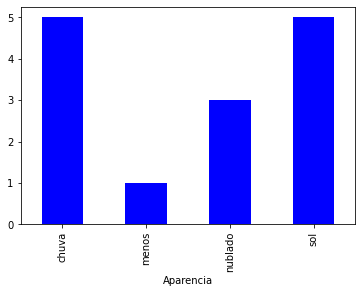

In [31]:
agrupado.plot.bar(color = 'blue')

In [32]:
#vento
agrupado = df.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:title={'center':'Vento'}, xlabel='Vento'>

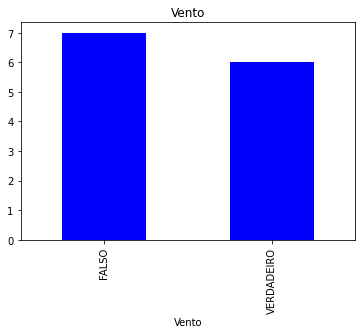

In [33]:
agrupado.plot.bar(color = 'blue', title = 'Vento')

In [34]:
#jogar
agrupado = df.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:title={'center':'Jogar'}, xlabel='Jogar'>

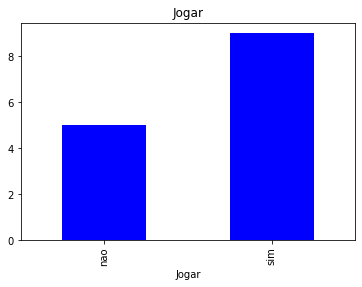

In [35]:
agrupado.plot.bar(color = 'blue', title = 'Jogar')

In [36]:
#explorar vairaveis numéricas
#temperatura

df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\Keper Vidal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

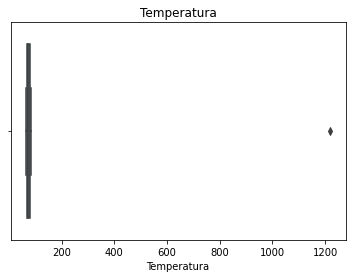

In [37]:
srs.boxplot(df['Temperatura']).set_title('Temperatura')

C:\Users\Keper Vidal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

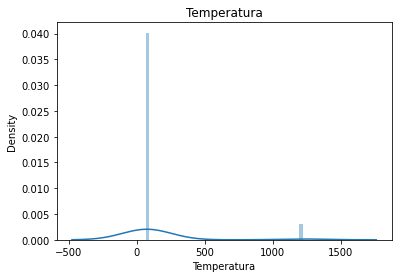

In [38]:
srs.distplot(df['Temperatura']).set_title('Temperatura')

In [39]:
#Umidade

df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\Keper Vidal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

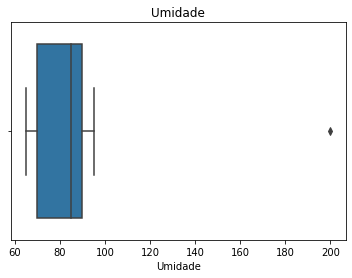

In [40]:
srs.boxplot(df['Umidade']).set_title('Umidade')

In [41]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [42]:
#aparencia do valor é invalida

agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [43]:
df.loc[df['Aparencia'] ==  'menos', 'Aparencia'] = "sol"
#visualiza o resultado
agrupado =df.groupby(['Aparencia']).size()
agrupado



Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [44]:
#temperatura fora do padrao estabelecido

df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [45]:
#encontrar os valores fora do padrão
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130 ) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [46]:

#calcular a mediana para substituição do valor fora do padrão
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [47]:
#substituir a mediana pelo valor fora do padrão
df.loc[(df['Temperatura'] < -130 ) | (df['Temperatura'] > 130), 'Temperatura'] = mediana


In [48]:
#verificando se houve a alteração
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130 ) ]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [49]:
#Umidade e vento, NANs

df['Umidade'].isnull().sum()

1

In [50]:
#calcular a mediana e dps preencher os NA

mediana = sts.median(['Umidade'])

df['Umidade'].fillna(mediana, inplace = True)

In [51]:
#verificando se houve substituição
df['Umidade'].isnull().sum()

0

In [52]:
#Agr com o vento
df['Vento'].isnull().sum()

1

In [53]:
#calculando a mediana e substituindo 
mediana = sts.median(['Vento'])

df['Vento'].fillna(mediana, inplace = True)


In [54]:
#verificando se houve substituição
df['Vento'].isnull().sum()

0